In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering , DBSCAN
from sklearn.metrics import silhouette_score as sil, silhouette_samples
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from google.colab import files
uploaded= files.upload()

Saving crime_data.csv to crime_data.csv


In [13]:
crime= pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [16]:
crime.rename(columns={"Unnamed: 0":"City"},inplace=True)
crime.set_index("City",inplace=True)
crime.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [17]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.0+ KB


In [19]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# **EDA**

In [20]:
crime.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [25]:
crime[crime.duplicated()].sum()

Murder      0.0
Assault     0.0
UrbanPop    0.0
Rape        0.0
dtype: float64

Scale the data using Standard Scaler

In [29]:
scaler= StandardScaler()
scaler_crime= scaler.fit_transform(crime)
scaler_crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# **Hierarchical Clustering**

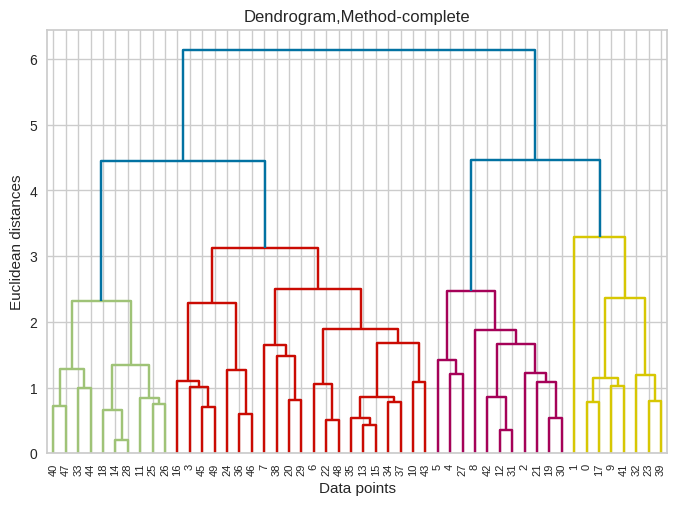

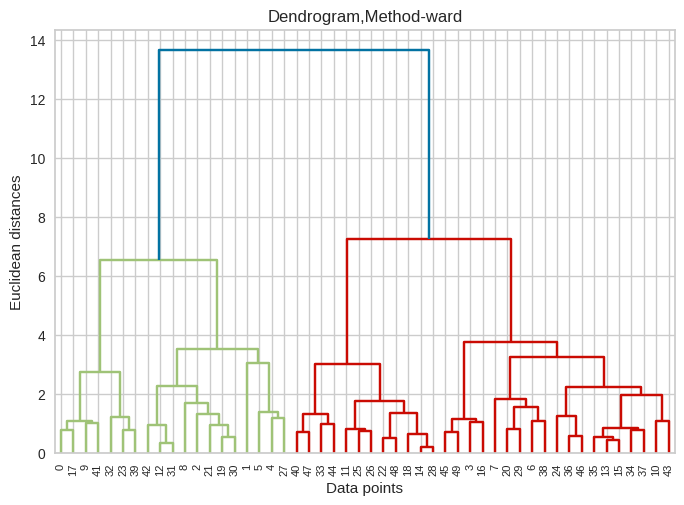

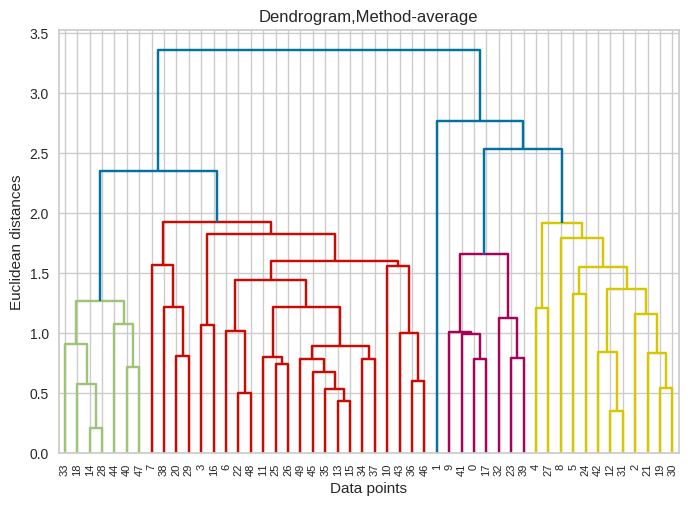

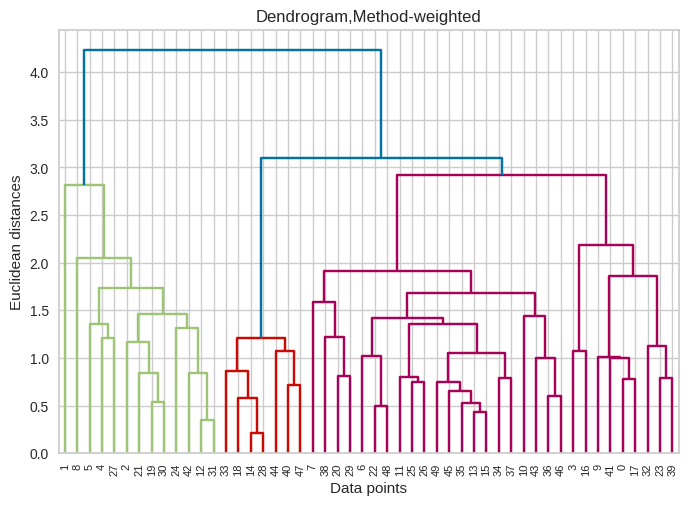

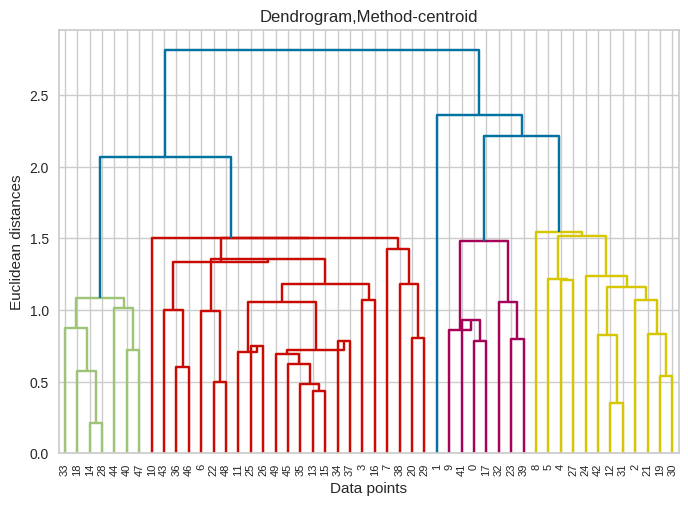

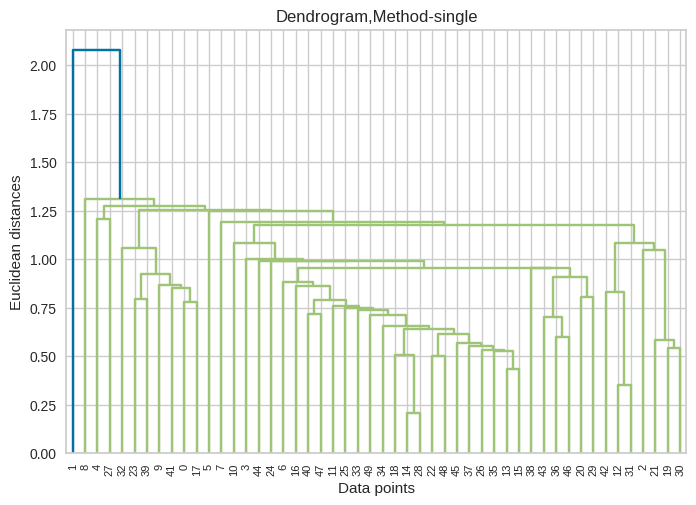

In [30]:
for methods in ["complete","ward","average","weighted","centroid","single"]:
  plt.title('Dendrogram,Method-{}'.format(methods))
  plt.xlabel('Data points')
  plt.ylabel('Euclidean distances')
  dendograms=sch.dendrogram(sch.linkage(scaler_crime, method=methods,optimal_ordering=False))
  plt.show()

Bluid The Model

In [31]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        model = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        labels1 = model.fit_predict(scaler_crime)
        silhouette_score1 = sil(scaler_crime,labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

# With two clusters the average linkage gives highest silhouette score

In [32]:
model_hc= AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="average")
model_hc.fit(scaler_crime)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='average')

In [35]:
model_hc.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [36]:
crime['ClusterID']= model_hc.labels_

In [37]:
grp_hc= crime.groupby(crime["ClusterID"])
grp_hc

In [38]:
grp_hc.agg(["mean"])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
ClusterID,,,,
0,12.165,255.250000,68.400000,29.165000
1,4.870,114.433333,63.633333,15.943333


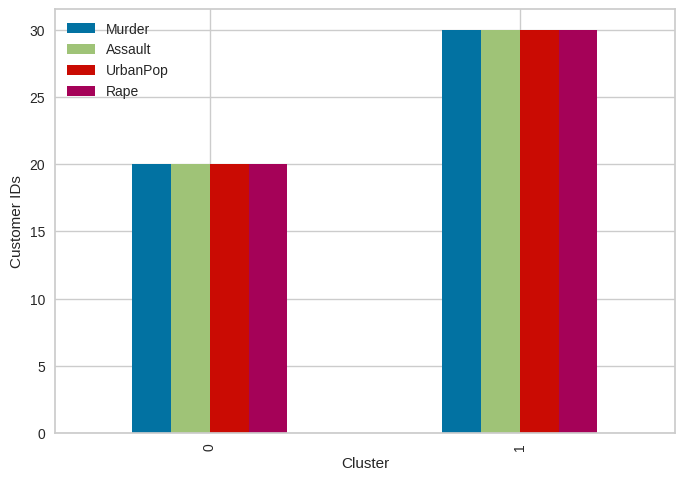

In [39]:
crime.groupby(['ClusterID']).count().plot(kind='bar')
plt.xlabel("Cluster")                                         ##########plotng barplot to get number of customers in each cluster
plt.ylabel("Customer IDs")
plt.show()

# **Kmeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

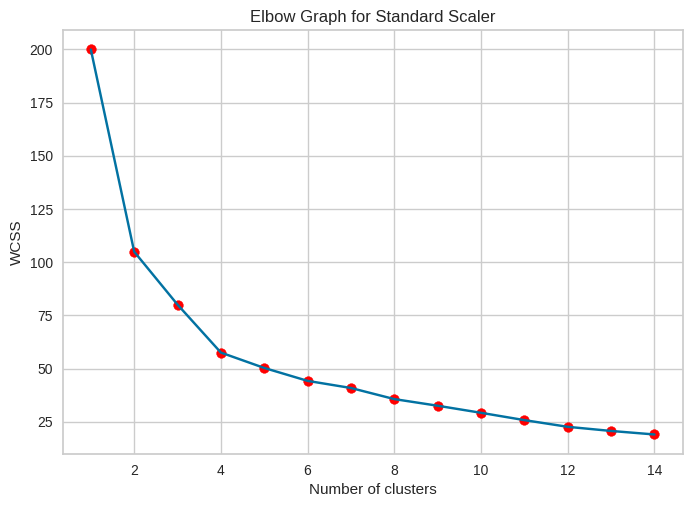

In [42]:
wcss=[]
for i in range(1,15):
  km= KMeans(n_clusters=i,random_state=42)
  km.fit(scaler_crime)
  wcss.append(km.inertia_)

plt.plot(range(1,15),wcss)
plt.scatter(range(1,15),wcss,color="red")
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Above elbow graph shows elbow at point 4

In [43]:
model_km= KMeans(n_clusters=4,random_state=42)
model_km.fit(scaler_crime)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [44]:
model_km.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [45]:
crime["ClusterID"]= model_km.labels_

In [47]:
grp_km= crime.groupby(crime["ClusterID"])

In [48]:
grp_km.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
ClusterID,,,,
0,5.656250,138.875000,73.875000,18.781250
1,13.937500,243.625000,53.750000,21.412500
2,10.815385,257.384615,76.000000,33.192308
3,3.600000,78.538462,52.076923,12.176923


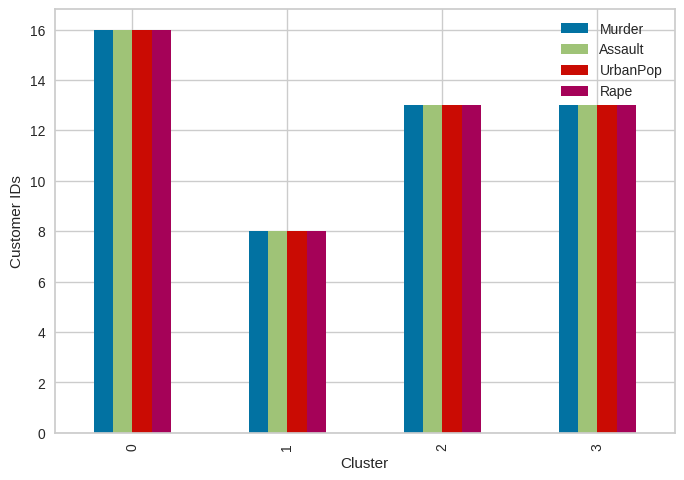

In [50]:
crime.groupby(['ClusterID']).count().plot(kind='bar')
plt.xlabel("Cluster")                                         ##########plotng barplot to get number of customers in each cluster
plt.ylabel("Customer IDs")
plt.show()

# **DBSCAN**

In [51]:
eps_values= np.linspace(0.1,1,10)
min_sample_val= range(2,15)
best_min_samples = None
best_eps = None
best_score= -1
for eps in eps_values:
  for min_samples in min_sample_val:
    dbscan= DBSCAN(eps=eps,min_samples=min_samples,metric="euclidean")
    labels_db= dbscan.fit_predict(scaler_crime)
    if len(np.unique(labels_db))>1:
      score_db= sil(scaler_crime,labels_db)
      if score_db>best_score:
        best_score = score_db
        best_eps = eps
        best_min_samples = min_samples

print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)
print("Best silhouette score:", best_score)

Best eps: 0.9
Best min_samples: 4
Best silhouette score: 0.266781916070482


In [52]:
final_dbscan= DBSCAN(eps=0.9,min_samples=4,metric="euclidean")
final_dbscan.fit(scaler_crime)

DBSCAN(eps=0.9, min_samples=4)

In [53]:
final_dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0])

In [54]:
crime["ClusterID"]= final_dbscan.labels_

In [57]:
grp_db= crime.groupby(crime['ClusterID'])

In [58]:
grp_db.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
ClusterID,,,,
-1,9.76,217.766667,69.533333,25.726667
0,4.83,100.250000,59.550000,14.490000


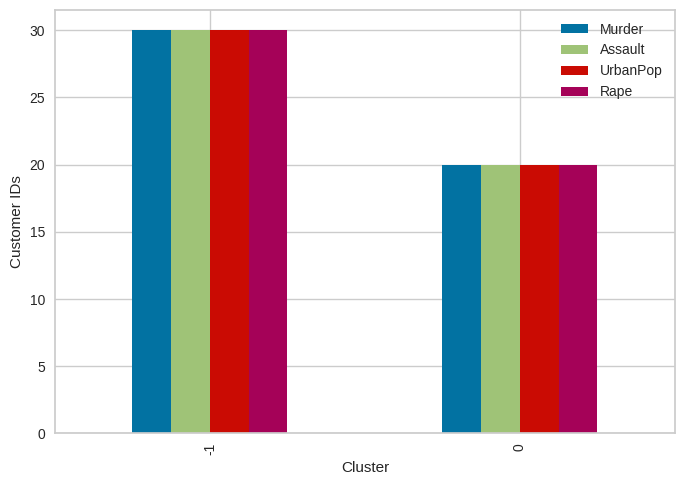

In [59]:
crime.groupby(['ClusterID']).count().plot(kind='bar')
plt.xlabel("Cluster")                                         ##########plotng barplot to get number of customers in each cluster
plt.ylabel("Customer IDs")
plt.show()

# **-1 are the noise points in our dataset and the rest are the clusters**